<p><span style="font-size: 16pt;">Worked example plotting shortest path</span></p>
<p>This is a worked example that commes from <a href="https://medium.com/@bobhaffner/osmnx-intro-and-routing-1fd744ba23d8">https://medium.com/@bobhaffner/osmnx-intro-and-routing-1fd744ba23d8</a>&nbsp;on how to plot and display the shortest paths between two points, this will be very useful for the project as it is not only the function we will use to find the shortest paths between stations but also makes it much easier to create isochrone maps</p>

In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt
%matplotlib inline

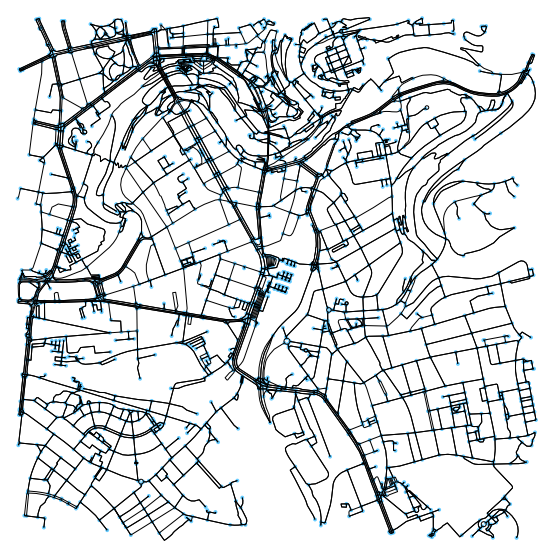

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25b72299358>)

In [2]:
# creating a graph from Luxembourg Central Station point
luxembourg_central_station = (49.5999681, 6.1342493)
G = ox.graph_from_point(luxembourg_central_station, distance=1250)
# quick plot
ox.plot_graph(G, fig_height=10, fig_width=10, edge_color='black')

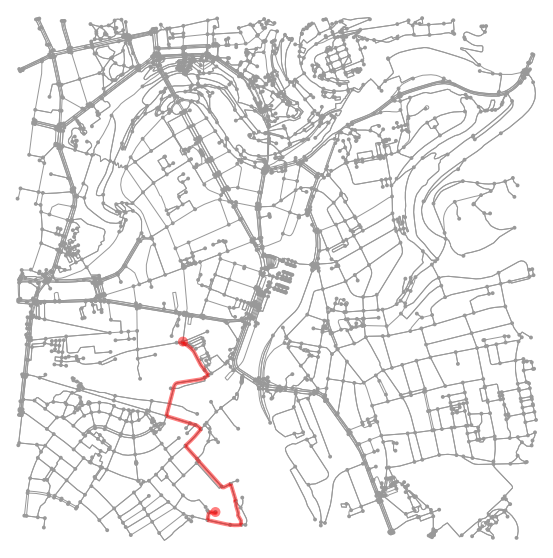

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25b71c92b70>)

In [3]:
# using NetworkX to calculate the shortest path between two random nodes
route = nx.shortest_path(G, np.random.choice(G.nodes), 
                         np.random.choice(G.nodes))
ox.plot_graph_route(G, route, fig_height=10, fig_width=10)

In [4]:
# We mark two geolocations of which we will attempt to find the shortest path between them
central_station = (49.5999681, 6.1342493)
dutch_embassy = (49.60635875, 6.126872750000004)

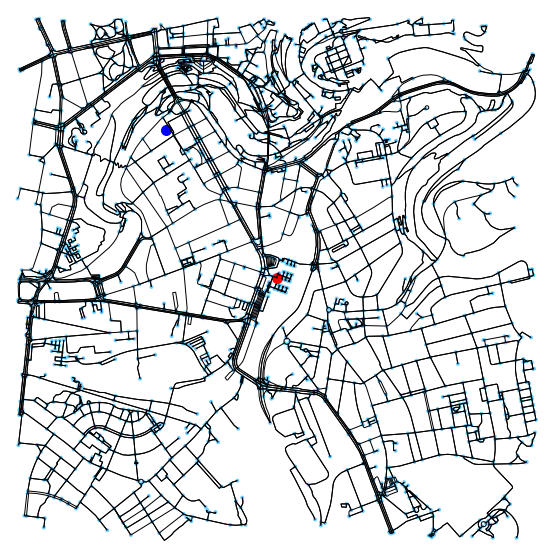

In [5]:
# We plot them on our map
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False, 
                        edge_color='black')
ax.scatter(central_station[1], central_station[0], c='red', s=100)
ax.scatter(dutch_embassy[1], dutch_embassy[0], c='blue', s=100)
plt.show()

In [6]:
#we can convert our graph into a GeoDataFrame
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,highway,osmid,ref,x,y,geometry
6052462593,NaN,6052462593,NaN,6.126530,49.610914,POINT (6.1265299 49.610914)
35348492,NaN,35348492,NaN,6.132349,49.598262,POINT (6.1323493 49.5982625)
35348501,NaN,35348501,NaN,6.127628,49.607555,POINT (6.1276281 49.6075548)
35348505,NaN,35348505,NaN,6.130158,49.606315,POINT (6.1301579 49.6063152)
35348506,NaN,35348506,NaN,6.131084,49.605448,POINT (6.131084 49.6054484)


In [7]:
# We build a KDTree to find the optimal nodes for pathfinding
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
central_station_idx = tree.query([central_station], k=1, return_distance=False)[0]
dutch_embassy_idx = tree.query([dutch_embassy], k=1, return_distance=False)[0]
closest_node_to_central_station = nodes.iloc[central_station_idx].index.values[0]
closest_node_to_dutch_embassy = nodes.iloc[dutch_embassy_idx].index.values[0]

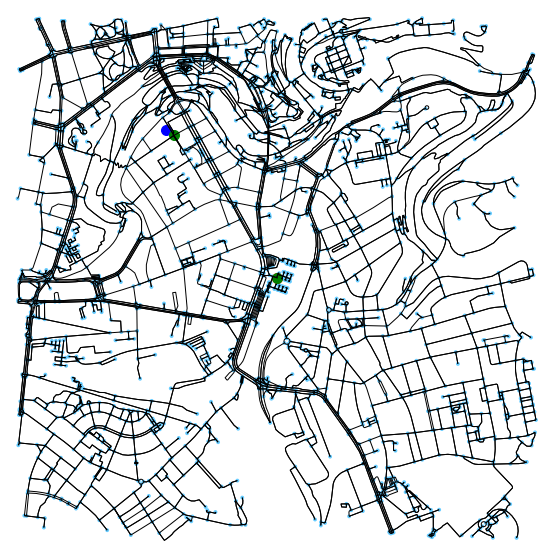

In [9]:
# This is what we get
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False, 
                        edge_color='black')
ax.scatter(central_station[1], central_station[0], c='red', s=100)
ax.scatter(dutch_embassy[1], dutch_embassy[0], c='blue', s=100)
ax.scatter(G.node[closest_node_to_central_station]['x'],
           G.node[closest_node_to_central_station]['y'], 
           c='green', s=100)
ax.scatter(G.node[closest_node_to_dutch_embassy]['x'],   
           G.node[closest_node_to_dutch_embassy]['y'], 
           c='green', s=100)
plt.show()

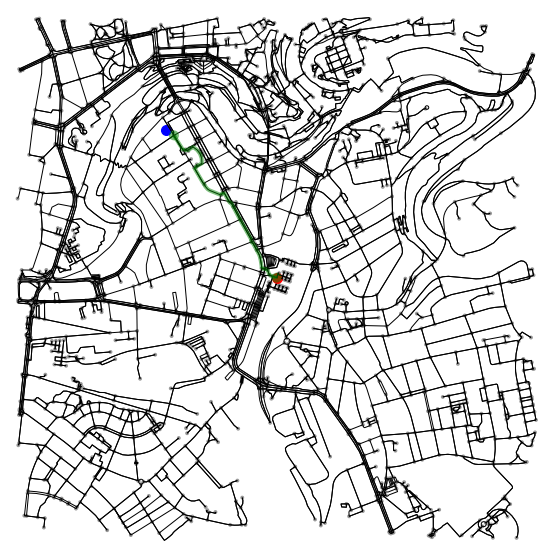

In [10]:
# We now use networkx to find the shortest path
route = nx.shortest_path(G, closest_node_to_central_station,
                         closest_node_to_dutch_embassy)
fig, ax = ox.plot_graph_route(G, route, fig_height=10, 
                              fig_width=10, 
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='green')
ax.scatter(central_station[1], central_station[0], c='red', s=100)
ax.scatter(dutch_embassy[1], dutch_embassy[0], c='blue', s=100)
plt.show()

In [13]:
# We can also view it on folium
m = ox.plot_route_folium(G, route, route_color='green')
folium.Marker(location=central_station,
              icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=dutch_embassy,
              icon=folium.Icon(color='blue')).add_to(m)
m